In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('/content/student_methods.csv')

Dataset preview:
   visual_score  auditory_score  kinesthetic_score learning_style
0      8.000301        1.389837           9.686887         visual
1      8.401052        7.294055           4.853655         visual
2      9.124874        3.975049           6.688173       auditory
3      5.724100        7.702631           7.535001       auditory
4      5.060739        4.711628           4.302653    kinesthetic

Missing values:
visual_score         0
auditory_score       0
kinesthetic_score    0
learning_style       0
dtype: int64


<ipython-input-18-598fd2303c61>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='learning_style', y=col, palette='Pastel1')
<ipython-input-18-598fd2303c61>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='learning_style', y=col, palette='Pastel1')
<ipython-input-18-598fd2303c61>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='learning_style', y=col, palette='Pastel1')


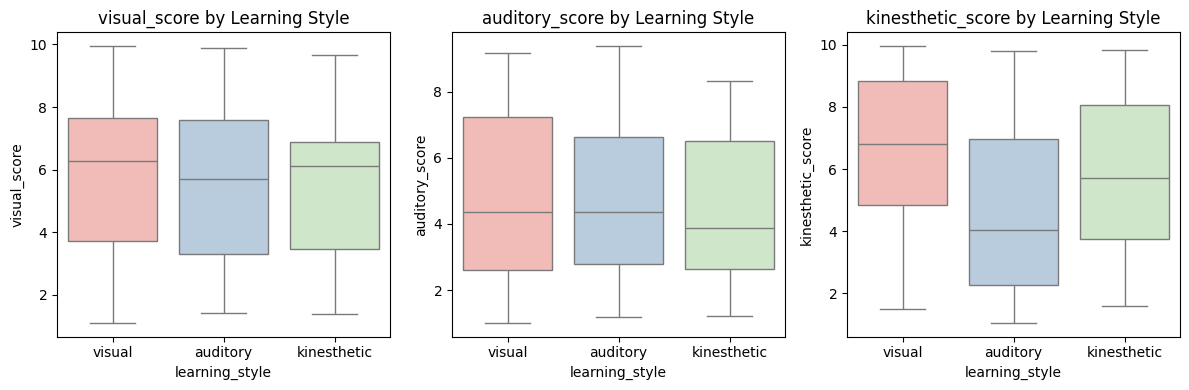

In [18]:
print("Dataset preview:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Encode the target variable
le = LabelEncoder()
df['learning_style_encoded'] = le.fit_transform(df['learning_style'])

# Box plots of each score by learning style
plt.figure(figsize=(12, 4))
for idx, col in enumerate(['visual_score', 'auditory_score', 'kinesthetic_score']):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(data=df, x='learning_style', y=col, palette='Pastel1')
    plt.title(f'{col} by Learning Style')
plt.tight_layout()
plt.show()

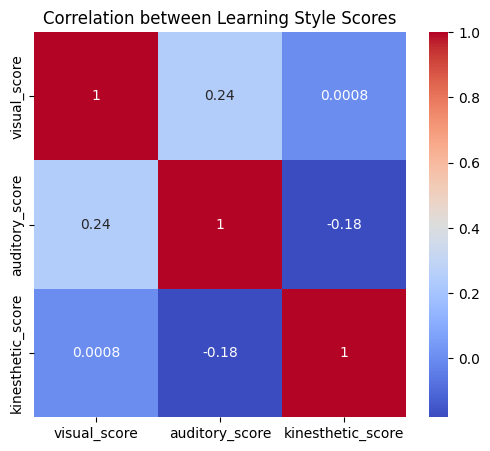


Classification Report:
              precision    recall  f1-score   support

    auditory       0.50      0.71      0.59         7
 kinesthetic       0.33      0.25      0.29         4
      visual       0.43      0.33      0.38         9

    accuracy                           0.45        20
   macro avg       0.42      0.43      0.42        20
weighted avg       0.43      0.45      0.43        20

Accuracy Score: 0.45


In [19]:
# Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[['visual_score', 'auditory_score', 'kinesthetic_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Learning Style Scores")
plt.show()

# Define features and target
X = df[['visual_score', 'auditory_score', 'kinesthetic_score']]
y = df['learning_style_encoded']

# Standardize features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

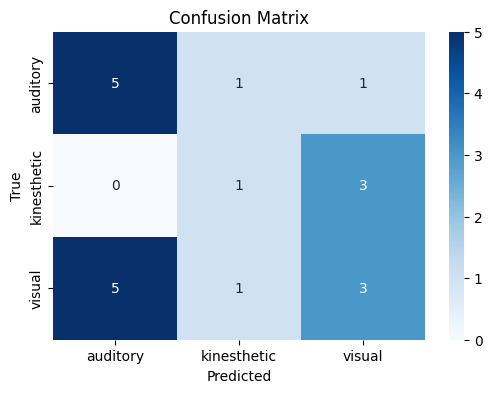

In [21]:
# Confusion matrix heatmap
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()




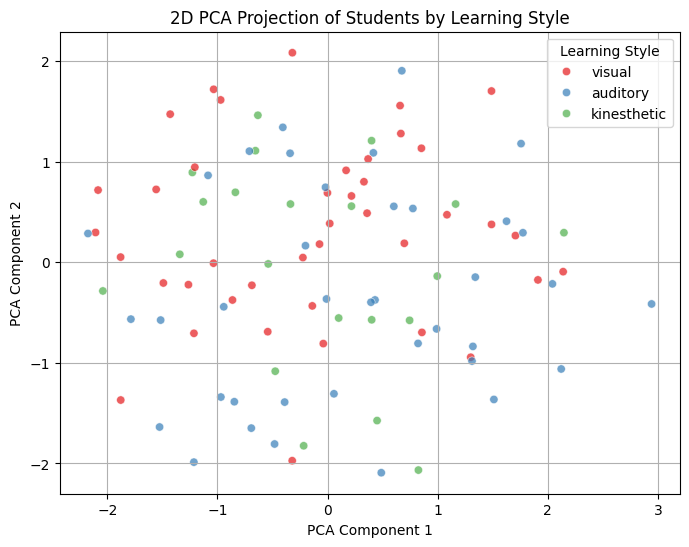

In [22]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for PCA plot
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'learning_style': df['learning_style']
})

# Plot PCA scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='learning_style', palette='Set1', alpha=0.7)
plt.title("2D PCA Projection of Students by Learning Style")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title='Learning Style')
plt.show()